In [23]:
import cv2
import numpy as np
net = cv2.dnn.readNet("config/yolov3.weights", "config/yolov3.cfg")

classes = []
with open("config/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# get layers of the network
layer_names = net.getLayerNames()
# Determine the output layer names from the YOLO model
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]


def center_bb(bb):
    x,y,w,h = bb
    c =(int(x+(w/2)), int(y+(h/2)))
    return c

def roi(img):

    img = cv2.resize(img, (1200,720))
    original = img
    height, width, channels = img.shape
    # USing blob function of opencv to preprocess image
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    # Detecting objects
    net.setInput(blob)
    outs = net.forward(output_layers)
    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # We use NMS function in opencv to perform Non-maximum Suppression
    # we give it score threshold and nms threshold as arguments.
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.2)
    #color = np.random.uniform(0, 255, size=(len(classes), 3))
    color = (255, 0, 0)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            #color = color[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            # cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1 / 2, color, 2)


    high_con ={'bb':[], 'con': [], 'class':[], 'cropped':[]}

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            x = int(x)
            y = int(y)
            w = int(w)
            h = int(h)
            high_con['bb'].append(boxes[i])
            high_con['con'].append(confidences[i])
            high_con['class'].append(class_ids[i])
            high_con['cropped'].append(original[y:y+ h, x:x + w])
    cv2.imwrite("frame.jpeg", img)
    return img, high_con

In [29]:
result = roi(cv2.cvtColor(cv2.imread("images/1.jpeg"), cv2.COLOR_BGR2RGB))

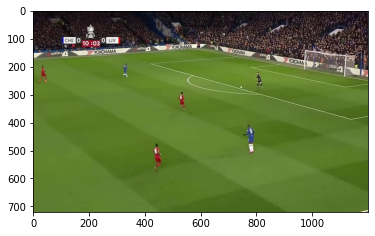

In [30]:
import matplotlib.pyplot as plt
plt.imshow(result[0])

In [31]:
print(result[1])

{'bb': [], 'con': [], 'class': [], 'cropped': []}
